### From sklearn.datasets load digits dataset and do following

    1. Classify digits (0 to 9) using the KNN classifier. You can use the different values for k neighbors and need to figure out a value for K that gives you the possible maximum score. You can manually try different values of K or use gridsearchcv
    2. Plot a confusion matrix
    3. Plot classification report


In [42]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
x = df
y = digits.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

###  1. Building our model and finding the best K value.

In [28]:
knn_grid = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [2, 3, 5, 7, 8, 10]
}, cv = 5, return_train_score=False)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 8, 10]})

In [29]:
df = pd.DataFrame(knn_grid.cv_results_)
df[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,2,0.978466
1,3,0.982924
2,5,0.982922
3,7,0.978466
4,8,0.976236
5,10,0.975495


### 2. Confusion Matrix for best fitting K (K=3)

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_prediction = knn.predict(x_test)
cm = confusion_matrix(y_test, y_prediction)

Text(60.0, 0.5, 'Truth')

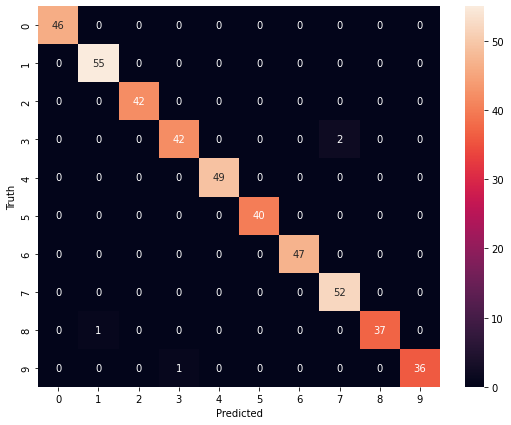

In [40]:
plt.figure(figsize=(9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 3. Classification Report

In [43]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        42
           3       0.98      0.95      0.97        44
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        47
           7       0.96      1.00      0.98        52
           8       1.00      0.97      0.99        38
           9       1.00      0.97      0.99        37

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

